
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">

# **1. Evaluate matricial vs point-wise implementations**  (30%)

Implement gradient descent approach from point-wise (like in class), matricial implementation and close solution. Evaluate the results and compare time performance. For doin so, use: 
 
-  **make_regression**, configurated as:
  - Use  ` make_regression` with 1000 samples and n_features=1
  - Using y = `target` and X= five feature

-  The dataset **Life Expectancy Data** [DATASET FROM KAGGLE](https://www.kaggle.com/kumarajarshi/life-expectancy-who). The target is `Life expectancy`

    - Use  all features
    - Select five features to train the model. The tuple of features can repeat among students. Please see on the list [Here]( Please see the list [Here](https://docs.google.com/spreadsheets/d/1IkDVr9eOSispScnJrLDb3k_shdivXDzjrJ1Cr77Yjq8/edit?usp=sharing))


**REMARK CONCLUSIONS. Explain the time results with respect to time. Conclude about life expectancy. How your features inside on target?**




Se carga el dataset de make_regression en las variables X y Y.

In [ ]:
#@title **Make_regression**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=1000, n_features=1, n_informative=1,random_state=0, noise=35)
print(X.shape)
print(Y.shape)

(1000, 1)
(1000,)


A continuación se carga el token de acceso a la api de kaggle para obtener los datos directamente desde la web.

In [ ]:
#Subir el token json para conectar con kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brayanbarajas","key":"641b5957036d7246fa746f789f950053"}'}

In [ ]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle
# This permissions change avoids a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Dec  3 06:44 kaggle.json


In [ ]:
#install in case it's not installed
#!pip install -q kaggle
!kaggle datasets download -d kumarajarshi/life-expectancy-who
!unzip life-expectancy-who.zip -d /content/Data # cambiar el nombre de archivo .zip
!rm life-expectancy-who.zip # cambiar el nombre de archivo .zip

  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 43.0MB/s]
Archive:  life-expectancy-who.zip
  inflating: /content/Data/Life Expectancy Data.csv  


Se carga el dataset descargado en la variable respectiva y posteriormente se eliminan los na ya que estos generan errores en el algoritmo; tampoco se debe rellenar estos valores con 0 porque alteraría el comportamiento de los datos.

In [ ]:
#@title **Life Expectancy**
life_data = pd.read_csv('Data/Life Expectancy Data.csv')
life_data=life_data.dropna()
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Se seleccionan los valores de la columna  `Life expectancy` como la Y a estimar, y para X se elimina esta columna junto con otras dos que no sirven para el modelo.

In [ ]:
Y_data=life_data["Life expectancy "].values
X_data=life_data.drop(["Country","Year","Status","Life expectancy "],axis=1)

In [ ]:
X_data.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Para seleccionar las 5 características para la X definitiva, se analizó la correlación entre todas las columnas y se determinó seleccionar algunas que tenían coeficientes de correlación bajos, en este caso fueron las siguientes.


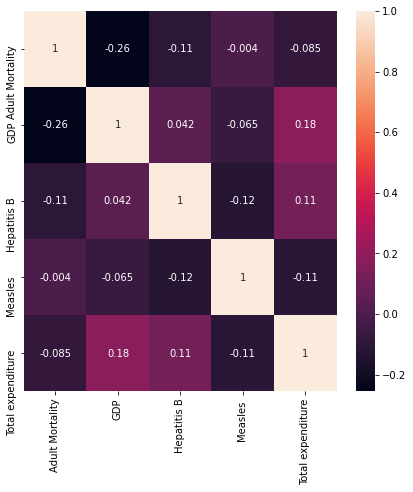

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,7))
X_data2 = X_data[['Adult Mortality','GDP','Hepatitis B', 'Measles ','Total expenditure']]
correlation_mat = X_data2.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()
X_data2=X_data2.values


# CLOSED SOLUTION

In [ ]:
def close_solution(X,Y):
  X_ad = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
  W=np.linalg.inv(X_ad.T.dot(X_ad)).dot(X_ad.T.dot(Y))
  return W

TIME:  0.00046515464782714844
shape beta:  (2,)  X shape:  (1000, 2)  y_est shape:  (1000,)
beta:  [ 0.90571543 81.9837073 ]
beta_0:  0.9057154321710241  beta_1:  81.98370730169577


Text(0, 0.5, 'Y')

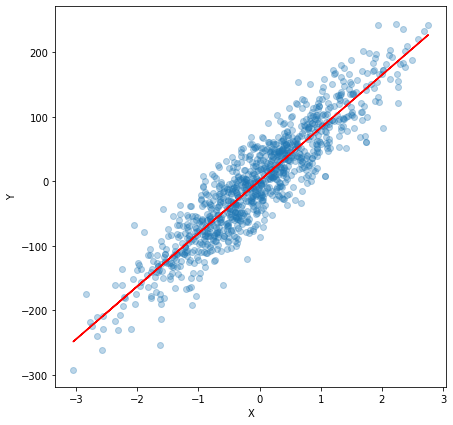

In [ ]:
import time
t0 = time.time()
%timeit  
beta=close_solution(X,Y)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
y_est = X_pon.dot(beta)
print("shape beta: ", beta.shape, " X shape: ",  X_pon.shape, " y_est shape: ", y_est.shape)
print("beta: ", beta)
print("beta_0: ", beta[0], " beta_1: ", beta[1])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')

Para visualizar si se obtuvo realmente una solución acertada en el caso del dataset de Life Expectancy, se graficaron únicamente las Y respecto a un índice ordenado.

TIME:  0.0009393692016601562
shape beta:  (6,)  X shape:  (1649, 6)  y_est shape:  (1649,)
beta:  [ 7.11416902e+01 -4.33769684e-02  2.04275787e-04  3.88530028e-02
 -2.91684076e-05  2.19498535e-01]
beta_0:  71.14169022904287  beta_1:  -0.043376968447783555


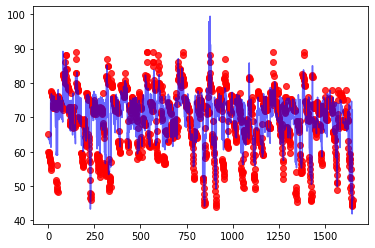

In [ ]:
import time
t0 = time.time()
%timeit  
beta2=close_solution(X_data2,Y_data)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon2 = np.concatenate((np.ones((X_data2.shape[0],1)), X_data2), axis=1)
y_est2 = X_pon2.dot(beta2)
print("shape beta: ", beta2.shape, " X shape: ",  X_pon2.shape, " y_est shape: ", y_est2.shape)
print("beta: ", beta2)
print("beta_0: ", beta2[0], " beta_1: ", beta2[1])

plt.scatter(np.arange(1,Y_data.shape[0]+1),Y_data, alpha=0.8,c="red" )
plt.plot(np.arange(1,Y_data.shape[0]+1),y_est2, alpha=0.6, c="blue" )

#POINT-WISE

A partir de las siguientes ecuaciones, se realiza la implementación del gradiente descendiente punto a punto.

$$J(w)=\frac{1}{n} \sum_{i=n}(f_w (x_i)-y_i)^2$$
$$f_w (x_i) =w_0 + w_1 x_i $$
$$\frac{\partial J}{\partial w_0}=\frac{2}{n}\sum_{i=n}(f_w(w_i)-y_i)$$
$$\frac{\partial J}{\partial w_1}=\frac{2}{n}\sum_{i=n}(f_w(w_i)-y_i)x_i$$


In [ ]:
def cost_fun_ew(w, X, Y):
    Y=Y.reshape(Y.shape[0])
    lin=w[0]
    for i in range(1,len(w)):
      lin+=(w[i]*X[:,i-1])
    J=(1/len(X))*np.sum((Y-lin)**2)
    
    return J
print("Prueba de la función de costo:")
print(cost_fun_ew(np.array([0, 1]), np.ones((X.shape[0],1)), np.ones((X.shape))))
print(cost_fun_ew(np.array([0, 0.5]), np.ones(X.shape), np.ones(X.shape)))
print(cost_fun_ew(np.array([200, 0.5]), X, Y))


def cost_grad_ew(w, X, Y):
    Y=Y.reshape(Y.shape[0])
    lin=w[0]
    for i in range(1,len(w)):
      lin+=(w[i]*X[:,i-1])
    w_dev=[]
    w_dev.append((2/len(X))*np.sum((lin)-Y))
    for i in range(1,len(w)):
      w_dev.append((2/len(X))*np.sum((lin-Y)*X[:,i-1]))
    
    return w_dev

print("Prueba del cálculo del gradiente:")
print(cost_grad_ew(np.array([0, 1]), np.ones(X.shape), np.ones(X.shape)))
print(cost_grad_ew(np.array([0, 0.5]), np.ones(X.shape), np.ones(X.shape)))
print(cost_grad_ew(np.array([200, 0.5]), X, Y))
print(cost_grad_ew(np.array([0, 0.1]), np.linspace(0, 1000, num=1000).reshape(1000,1), np.linspace(0, 1000, num=1000).reshape(1000,1)))


def grad_des_ew(X, Y, w, alpha, batch):
    hist_coste = []
    for i in range(batch):
      
      cost_i = cost_fun_ew(w, X, Y)
      hist_coste.append(cost_i)
      w_grad = cost_grad_ew(w, X, Y)
      for j in range(len(w)):
        w[j] = w[j] - alpha*w_grad[j]
      cost_ip = cost_fun_ew(w, X, Y)

 
      if (cost_i-cost_ip) < 1e-08:
        print("batch_i: ", i, "tolerance is satisfied: ", cost_i-cost_ip, "cost: ", cost_ip)
        break
     

    print("batch: ", i, "cost: ", cost_fun_ew(w, X, Y))
    return w, hist_coste

print("Prueba para la función del gradiente descendiente:")
beta, hist_coste = grad_des_ew(X, Y,np.array([1.0, -1]), 0.1, 500)
print(beta)


Prueba de la función de costo:
0.0
0.25
48794.957182138096
Prueba del cálculo del gradiente:
[0.0, 0.0]
[-1.0, -1.0]
[405.563937748797, -177.12295906200174]
[-900.0000000000001, -600300.3003003004]
Prueba para la función del gradiente descendiente:
batch_i:  62 tolerance is satisfied:  8.410097507294267e-09 cost:  1205.9084895409262
batch:  62 cost:  1205.9084895409262
[ 0.90565487 81.9835913 ]


batch:  499 cost:  1205.9085131182699
TIME:  0.045060157775878906
shape beta:  (2,)  X shape:  (1000, 2)  y_est shape:  (1000,)
beta:  [ 0.90392254 81.97905461]
beta_0:  0.9039225412169476  beta_1:  81.97905461223826


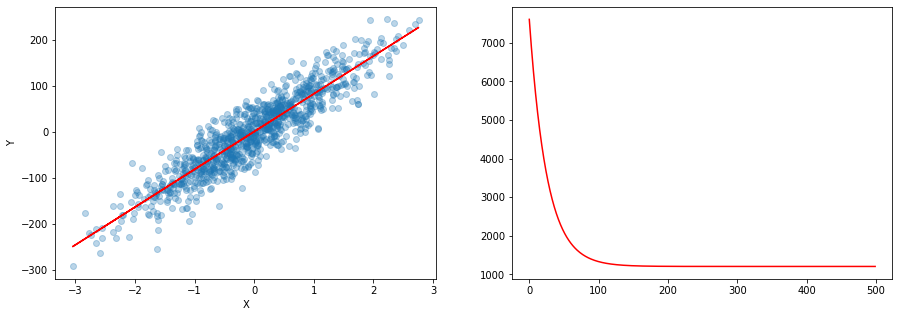

In [ ]:
#@title **code**
import time

t0 = time.time()
%timeit  
beta, hist_coste = grad_des_ew(X, Y, np.array([1.0, 1]), 0.01, 500)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon = np.concatenate((np.ones(X.shape), X), axis=1)
y_est = X_pon.dot(beta)
print("shape beta: ", beta.shape, " X shape: ",  X_pon.shape, " y_est shape: ", y_est.shape)
print("beta: ", beta)
print("beta_0: ", beta[0], " beta_1: ", beta[1])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")

Para poder aplicar el gradiente descendiente, fue necesario aplicar una estandarización de los datos.

batch_i:  59 tolerance is satisfied:  9.162738456858222e-09 cost:  0.4133642360650766
batch:  59 cost:  0.4133642360650766
TIME:  0.014809370040893555
shape beta:  (6,)  X shape:  (1649, 6)  y_est shape:  (1649,)
beta:  [ 1.53249554e-06 -6.17782714e-01  2.66611333e-01  1.13148662e-01
 -3.33956295e-02  5.73373677e-02]


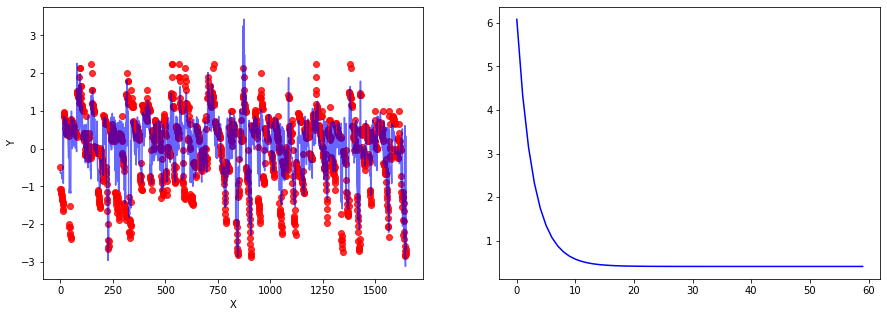

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#X_data2_norm=ss.fit_transform(X_data2)
#Y_data_norm=ss.fit_transform(Y_data.reshape(Y_data.shape[0],1))
X_data2_norm=(X_data2-np.mean(X_data2,0))/np.std(X_data2,0);Y_data_norm=(Y_data-np.mean(Y_data,0))/np.std(Y_data,0) #Normalización de los datos
import time
t0 = time.time()
%timeit  

beta2, hist_coste2 = grad_des_ew(X_data2_norm, Y_data_norm, np.array([1.0, 1,1,1,1,1]), 0.1,60)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon2 = np.concatenate((np.ones((X_data2_norm.shape[0],1)), X_data2_norm), axis=1)
y_est2_norm = X_pon2.dot(beta2)
print("shape beta: ", beta2.shape, " X shape: ",  X_pon2.shape, " y_est shape: ", y_est2.shape)
print("beta: ", beta2)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(range(len(Y_data_norm)),Y_data_norm, alpha=0.8, c="red" )
ax.plot(range(len(y_est2_norm)),y_est2_norm, alpha=0.6, c="blue" )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste2)) , hist_coste2, c="blue")

# MATRICIAL APPROXIMATION




In [ ]:
 #@title **code**
 alpha = np.array([0, 0.5])
alpha = alpha.reshape(alpha.shape[0],1)
alpha.shape

(2, 1)

In [ ]:
#@title matricial cost fuction
def cost_fun_mat(beta, X, Y):
  import numpy as np
  Y=Y.reshape(Y.shape[0])
  X1=np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
  r1=Y-(X1.dot(beta))
  r=r1.T.dot(r1)
  J=(1/len(X))*r


  return J
print("Prueba de la función de costo:")  
print(cost_fun_mat(np.array([0, 1]), np.ones(X.shape), np.ones(X.shape)))
print(cost_fun_mat(np.array([0, 0.5]), np.ones(X.shape), np.ones(X.shape)))
print(cost_fun_mat(np.array([200, 0.5]), X, Y))

Prueba de la función de costo:
0.0
0.25
48794.95718213809


In [ ]:
#@title **cost_grad_mat(beta, X, Y)**

def cost_grad_mat(beta, X, Y):
  Y=Y.reshape(Y.shape[0])
  X1=np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
  w_dev=np.array([(2/len(X))*np.sum((X1.dot(beta)-Y))])
  w_dev=np.concatenate((w_dev,((2/len(X))*((X1.dot(beta)-Y).dot(X)))))
  return np.array(w_dev)

print("Prueba del cálculo del gradiente:")
print(cost_grad_mat(np.array([0, 1]), np.ones(X.shape), np.ones(X.shape)))
print(cost_grad_mat(np.array([0, 0.5]), np.ones(X.shape), np.ones(X.shape)))
print(cost_grad_mat(np.array([0, 0.1]), np.linspace(0, 1000, num=1000).reshape(1000,1), np.linspace(0, 1000, num=1000)))
print(cost_grad_mat(np.array([200, 0.5]), X, Y))

Prueba del cálculo del gradiente:
[0. 0.]
[-1. -1.]
[   -900.        -600300.3003003]
[ 405.56393775 -177.12295906]


In [ ]:
#@title # MATRICIAL GRADIENT DESCENNT 
def grad_des_mat(w, X, Y, alpha, batch):
    hist_coste = []
    for i in range(batch):
      
      cost_i = cost_fun_mat(w, X, Y)
      hist_coste.append(cost_i)
      w_grad = cost_grad_mat(w, X, Y)
      w = w - alpha*w_grad
      cost_ip = cost_fun_mat(w, X, Y)

 
      if (cost_i-cost_ip) < 1e-08:
        print("batch_i: ", i, "tolerance is satisfied: ", cost_i-cost_ip, "cost: ", cost_ip)
        break
     

    print("batch: ", i, "cost: ", cost_fun_mat(w, X, Y))
    return w, hist_coste

print("Prueba para la función del gradiente descendiente:")
beta, hist_coste = grad_des_mat(np.array([1.0, 0.1]), X, Y, 0.1, 50)

beta, hist_coste = grad_des_mat(np.array([1.0, -1]),X, Y, 0.1, 70)
print(beta)

Prueba para la función del gradiente descendiente:
batch:  49 cost:  1205.9084931927844
batch_i:  62 tolerance is satisfied:  8.410552254645154e-09 cost:  1205.9084895409258
batch:  62 cost:  1205.9084895409258
[ 0.90565487 81.9835913 ]


batch:  499 cost:  1205.9085131182699
TIME:  0.03856205940246582
shape beta:  (2,)  X shape:  (1000, 2)  y_est shape:  (1000,)
beta:  [ 0.90392254 81.97905461]


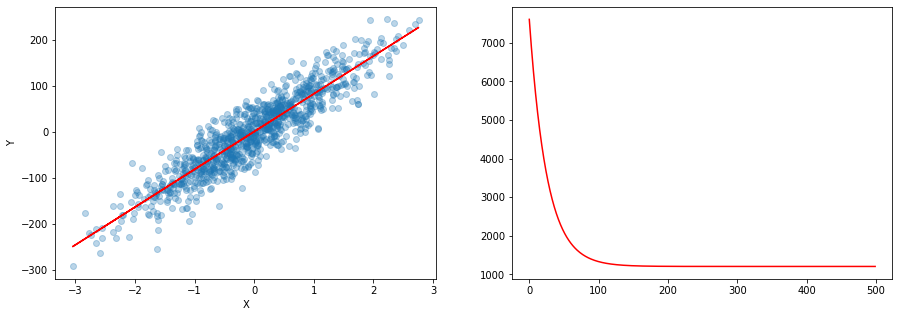

In [ ]:
#@title **code**
import time

t0 = time.time()
%timeit  
beta, hist_coste = grad_des_mat(np.array([1.0, 1]), X, Y, 0.01, 500)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon = np.concatenate((np.ones(X.shape), X), axis=1)
y_est = X_pon.dot(beta)
print("shape beta: ", beta.shape, " X shape: ",  X_pon.shape, " y_est shape: ", y_est.shape)
print("beta: ", beta)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")

Para esta, también es necesario utilizar los datos de Life Expectancy normalizados ya que igualmente se trata del gradiente descendiente.

batch_i:  59 tolerance is satisfied:  9.162738456858222e-09 cost:  0.4133642360650766
batch:  59 cost:  0.4133642360650766
TIME:  0.013934135437011719
shape beta:  (6,)  X shape:  (1649, 6)  y_est shape:  (1649,)
beta:  [ 1.53249554e-06 -6.17782714e-01  2.66611333e-01  1.13148662e-01
 -3.33956295e-02  5.73373677e-02]


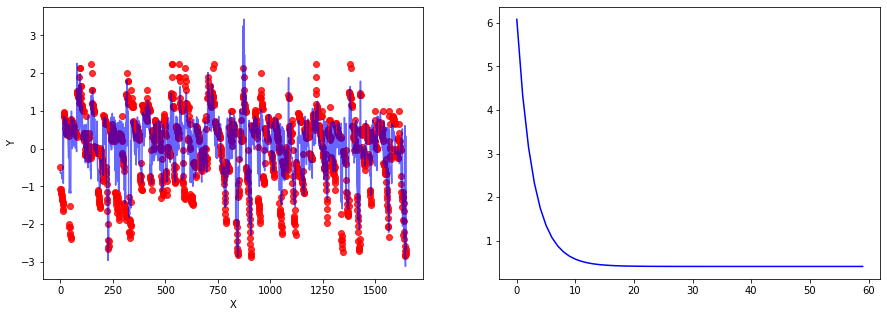

In [ ]:
X_data2_norm=(X_data2-np.mean(X_data2,0))/np.std(X_data2,0);Y_data_norm=(Y_data-np.mean(Y_data,0))/np.std(Y_data,0)

#Otra forma de normalizar
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_data2_norm=ss.fit_transform(X_data2) 
#Y_data_norm=ss.fit_transform(Y_data.reshape(Y_data.shape[0],1))

import time
t0 = time.time()
%timeit  

beta2, hist_coste2 = grad_des_mat(np.array([1.0, 1,1,1,1,1]),X_data2_norm, Y_data_norm, 0.1,60)
t1 = time.time()
print("TIME: ", t1-t0) 

X_pon2 = np.concatenate((np.ones((X_data2_norm.shape[0],1)), X_data2_norm), axis=1)
y_est2_norm = X_pon2.dot(beta2)
print("shape beta: ", beta2.shape, " X shape: ",  X_pon2.shape, " y_est shape: ", y_est2.shape)
print("beta: ", beta2)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(range(len(Y_data_norm)),Y_data_norm, alpha=0.8, c="red" )
ax.plot(range(len(y_est2_norm)),y_est2_norm, alpha=0.6, c="blue" )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste2)) , hist_coste2, c="blue")

## Conclusiones
- En cuanto al tiempo, se puede apreciar que en esta ocasión la solución cerrada fue la más rápida en ejecutarse, a pesar de tener el costo computacional más elevado; esto debido a que ambos conjuntos de datos no eran particularmente grandes por lo que, en el caso del gradiente descendiente lo que determinó ese incremento en el tiempo fueron las iteraciones realizadas. Ahora, entre la implementación matricial y la punto a punto, se alcanza a notar una leve reducción en el tiempo de la primera respecto a la segunda, que en conjuntos de datos mucho más grandes podría llegar a ser determinante.
- Respecto al dataset de **Life Expectancy**, al elegir las 5 características de 'Adult Mortality', 'GDP', 'Hepatitis B', 'Measles' y 'Total expenditure', se pudo obtener una aproximación muy cercana a la solución cerrada en menos de 100 iteraciones, por lo que la selección de las mismas fue realizada adecuadamente sin perder la información más relevante.
- Un punto a destacar es que la solución cerrada admite los datos sin normalizar y se llega de igual forma a la respuesta deseada, mientras que en el gradiente descendiente puede resultar necesario hacer una estandarización o normalización para este método pueda obtener una buena aproximación; como en este caso en que, si no se realizaba este preprocesamiento, el método no podía obtener los pesos adecuados debido a la variabilidad entre las características.

# **2. Use a regression-DNN to predict COVID-19 cases in Colombia** (30%)

Current COVID-19 report in Colombia is available [here](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data). Taken from (www.datos.gov.co). You should estimate the progression of:
- new deads (muertes) for next **100** days. 

Please,take into account, the next instructions: 

1. For prediction variable `new deads` (muertes)) use the signal of total cases. see Figure of example.
2. Use KERAS to built a  DNN-regressor to predict new deads. Explain and justify the number of layers and neurons used in the architecture. 
3. As training features (**X**) use the previously N-values of each variable. Evaluate the algorithm with $N=\{7, 30\} $. For instance, if the value is the sample in $y_t$, the corresponding feature vector is $X_t = \{y_{t-1}, y_{t-2}, \ldots, y_{t-n}\}$. See Figure of example.
4. Evaluate the algorithm with curren data, to measure the error, and then you should obtain new 100 points, corresponding to next **100** days.
5. Use the COVID-19 DATA until November 1.  

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/talleres/imgs/tl_1pred.png" >


**REMARK CONCLUSIONS. Explain and justify the number of layers and neurons used in the architecture. Justify the observed results**



Para cargar el dataset, se utilizó la fuente json que provee la web, en donde directamente se puede realizar una consulta para agrupar la cantidad de muertos por día, lo que facilita el tratamiento de los datos. Además, es necesario cambiar el tipo de datos de la columna fecha muerte de cadena a fecha, así como eliminar la fila que corresponde a la agrupación de fechas vacías (es decir, personas que no murieron).

In [ ]:
df = pd.read_json(r"https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=fecha_muerte,count(*)%20as%20Y&$group=fecha_muerte")
df=df.drop(df.index[len(df)-1])
df["fecha_muerte"] = pd.to_datetime(df["fecha_muerte"], format="%d/%m/%Y  %H:%M:%S")
df=df.sort_values(by=['fecha_muerte'],ignore_index="True")
df=df.drop(df.index[len(df)-1]) #se elimina el último día ya que suele presentar información incompleta
df.tail()

,fecha_muerte,Y
251,2020-11-27,210
252,2020-11-28,174
253,2020-11-29,172
254,2020-11-30,147
255,2020-12-01,131


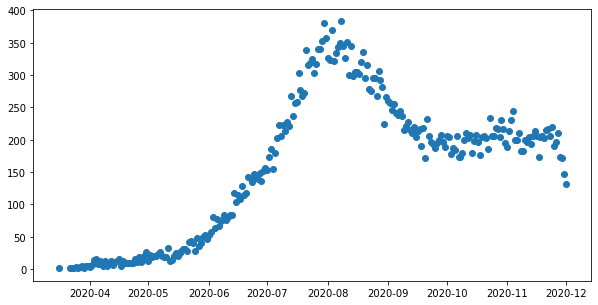

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["fecha_muerte"],df["Y"])

Luego de esto, se rellenan las fechas intermedias faltantes debido a que no hubo muertos ese día, esto realmente ocurre en los primeros días, como es de suponerse.

In [ ]:
idx = pd.date_range(min(df.fecha_muerte), max(df.fecha_muerte))
df.index = pd.DatetimeIndex(df.fecha_muerte)
df = df.reindex(idx, fill_value=0)
df.fecha_muerte=df.index
df1=df.copy()
df1=df1.reset_index()
df1.drop(["index"],axis=1,inplace=True)
df1.head(7)

,fecha_muerte,Y
0,2020-03-16,1
1,2020-03-17,0
2,2020-03-18,0
3,2020-03-19,0
4,2020-03-20,0
5,2020-03-21,0
6,2020-03-22,1


A partir de la realizado anteriormente, es hora de ajustar el dataset para obtener lo que se le pasará a la red. Para esto, se crean la cantidad de columnas necesarias de acuerdo a la ventana, donde $Y_t$ es el target de la cantidad de muertes en dicho día, y las columnas $x_i$ corresponden a los datos de la cantidad de muertes de $Y_{t-i}$.

In [ ]:
#Ventana de 7 días
n=7
cols7=["x%d" % i for i in range(0,n+1)]
cols7[0]='Y'
fechas7 = pd.date_range(df.fecha_muerte[n], max(df1.fecha_muerte))
row_list = []
for i in range(n,len(df1)):
  row_list.append(dict( (a,df1['Y'][i-j]) for j,a in enumerate(cols7)))
df7 = pd.DataFrame(row_list, columns=cols7)
df7['fecha_muerte']=fechas7
df7.tail()

,Y,x1,x2,x3,x4,x5,x6,x7,fecha_muerte
249,210,197,190,219,206,216,215,202,2020-11-27
250,174,210,197,190,219,206,216,215,2020-11-28
251,172,174,210,197,190,219,206,216,2020-11-29
252,147,172,174,210,197,190,219,206,2020-11-30
253,131,147,172,174,210,197,190,219,2020-12-01


In [ ]:
#Ventana de 30 días
n=30
cols30=["x%d" % i for i in range(0,n+1)]
cols30[0]='Y'
fechas30 = pd.date_range(df.fecha_muerte[n], max(df1.fecha_muerte))
row_list = []
for i in range(n,len(df1)):
  row_list.append(dict( (a,df1['Y'][i-j]) for j,a in enumerate(cols30)))
df30 = pd.DataFrame(row_list, columns=cols30)
df30['fecha_muerte']=fechas30
df30.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,fecha_muerte
0,12,11,7,12,9,5,13,5,9,12,8,15,14,7,4,5,5,1,5,3,2,4,1,1,1,0,0,0,0,0,1,2020-04-15
1,16,12,11,7,12,9,5,13,5,9,12,8,15,14,7,4,5,5,1,5,3,2,4,1,1,1,0,0,0,0,0,2020-04-16
2,5,16,12,11,7,12,9,5,13,5,9,12,8,15,14,7,4,5,5,1,5,3,2,4,1,1,1,0,0,0,0,2020-04-17
3,13,5,16,12,11,7,12,9,5,13,5,9,12,8,15,14,7,4,5,5,1,5,3,2,4,1,1,1,0,0,0,2020-04-18
4,9,13,5,16,12,11,7,12,9,5,13,5,9,12,8,15,14,7,4,5,5,1,5,3,2,4,1,1,1,0,0,2020-04-19


A continuación, se divide cada conjunto de datos creado anteriormente en train y test. Para train, se selecciona el conjunto de datos hasta Noviembre 1 de 2020, mientras que para test, se hace desde el 2 de Noviembre hasta la fecha actual (1 de Diciembre de 2020).

In [ ]:
df7a=df7[df7["fecha_muerte"]<="2020-11-01"];df7b=df7[df7["fecha_muerte"]>"2020-11-01"]
Y7_train=df7a["Y"].values;X7_train=df7a.iloc[:,1:8].values
Y7_test=df7b["Y"].values;X7_test=df7b.iloc[:,1:8].values

#ss=StandardScaler()
#X7_train_norm=ss.fit_transform(X7_train);Y7_train_norm=ss.fit_transform(Y7_train.reshape(Y7_train.shape[0],1))
#X7_test_norm=ss.fit_transform(X7_train);Y7_test_norm=ss.fit_transform(Y7_train.reshape(Y7_train.shape[0],1))

df30a=df30[df30["fecha_muerte"]<="2020-11-01"];df30b=df30[df30["fecha_muerte"]>"2020-11-01"]
Y30_train=df30a["Y"].values;X30_train=df30a.iloc[:,1:31].values
Y30_test=df30b["Y"].values;X30_test=df30b.iloc[:,1:31].values

## Red para ventana de 7 días
Primeramente, se crea la red para la ventana de 7 días.

In [ ]:
import tensorflow as tf
model7 = tf.keras.Sequential([
                             tf.keras.layers.Dense(63, activation='relu', input_shape=[X7_train.shape[1]]),
                             tf.keras.layers.Dense(126, activation='relu'),
                             tf.keras.layers.Dense(252, activation='relu'),
                             tf.keras.layers.Dense(1)])


  # Choose the preference optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  
  #Select the loss function (MSE)
model7.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

model7.summary()  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 63)                504       
_________________________________________________________________
dense_13 (Dense)             (None, 126)               8064      
_________________________________________________________________
dense_14 (Dense)             (None, 252)               32004     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 253       
Total params: 40,825
Trainable params: 40,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
iterations = 100
history = model7.fit(X7_train, Y7_train, epochs=iterations, verbose=True,  validation_data=(X7_test, Y7_test))

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 38386.6016 - mae: 158.3013 - mse: 38386.6016 - val_loss: 32933.3516 - val_mae: 179.9326 - val_mse: 32933.3516
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 27216.5488 - mae: 133.7821 - mse: 27216.5488 - val_loss: 22717.5898 - val_mae: 148.9670 - val_mse: 22717.5898
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 18716.7812 - mae: 110.7451 - mse: 18716.7812 - val_loss: 14586.8809 - val_mae: 118.6910 - val_mse: 14586.8809
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 11856.5020 - mae: 88.2930 - mse: 11856.5020 - val_loss: 8578.7520 - val_mae: 89.9540 - val_mse: 8578.7520
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 6858.7778 - mae: 67.0145 - mse: 6858.7778 - val_loss: 4420.7788 - val_mae: 62.7518 - val_mse: 4420.7788
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 3547.8813 - mae: 47.4811 - mse: 3

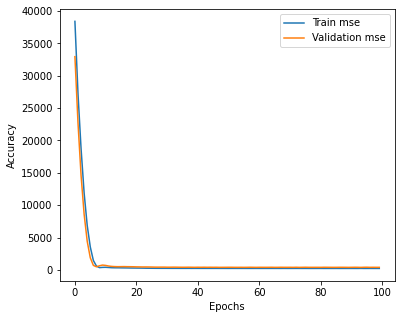

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['mse'], label='Train mse');
ax.plot(history.history['val_mse'], label='Validation mse');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
#ax = fig.add_subplot(1, 2, 2)
#ax.plot(history.history['loss'], label='train loss');
#ax.plot(history.history['val_loss'], label='evaluation loss');
#ax.legend();
#ax.set_xlabel('Epochs');
#ax.set_ylabel('Loss');

A continuación se muestra la gráfica obtenida en training, donde los puntos azules son los datos reales mientras los naranjas son los obtenidos por medio de la red.

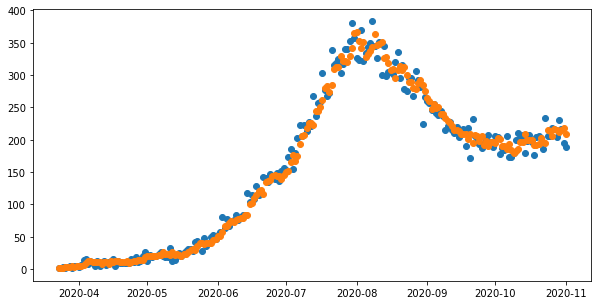

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df7a["fecha_muerte"],df7a["Y"])
y_est=model7.predict(X7_train)
plt.scatter(df7a["fecha_muerte"],y_est)

A continuación se muestra la gráfica obtenida para test, en donde los puntos azules son los datos reales mientras los naranjas son los obtenidos por medio de la red.

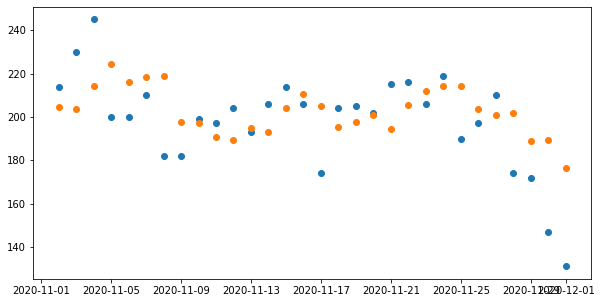

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df7b["fecha_muerte"],df7b["Y"])
y_est=model7.predict(X7_test)
plt.scatter(df7b["fecha_muerte"],y_est)

### Predicción para los siguientes 100 días
Para realizar la predicción, es necesario obtener las x del último día para generar un ciclo en el que se vaya prediciendo de a 1 día y al mismo tiempo se vaya generando el nuevo conjunto de x para la siguiente predicción.

In [ ]:
X7_pred=np.concatenate((np.array([Y7_test[len(Y7_test)-1]]), X7_test[len(X7_test)-1,0:6].T), axis=0 ).reshape((1,7))
Y7_pred=np.zeros((1,100))
for i in range(100):
  Y7_pred[0,i]=model7.predict(X7_pred)[0]
  X7_pred=np.concatenate((np.array([Y7_pred[0,i]]), X7_pred[0,0:6].T), axis=0 ).reshape((1,7))

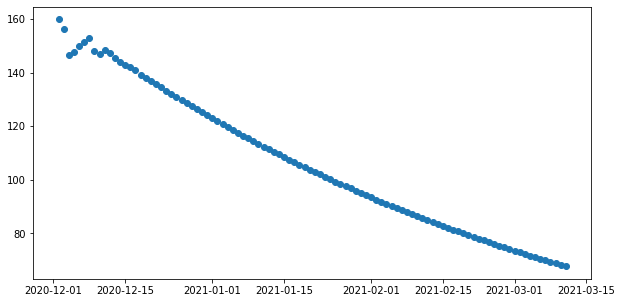

In [ ]:
import datetime
fechas_plt = pd.date_range(df7.fecha_muerte[len(df7)-1]++ datetime.timedelta(days=1), df7.fecha_muerte[len(df7)-1]+ datetime.timedelta(days=100))
plt.figure(figsize=(10,5))
y_est=model7.predict(X7_test)
plt.scatter(fechas_plt,Y7_pred)

## Red para ventana de 30 días
Ahora, se procede a realizar el mismo procedimiento para la ventana de 30 días.

In [ ]:
import tensorflow as tf
model30 = tf.keras.Sequential([
                             tf.keras.layers.Dense(90, activation='relu', input_shape=[X30_train.shape[1]]),
                             tf.keras.layers.Dense(180, activation='relu'),
                             tf.keras.layers.Dense(270, activation='relu'),
                             tf.keras.layers.Dense(1)])


  # Choose the preference optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  
  #Select the loss function (MSE)
model30.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

model30.summary()  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 90)                2790      
_________________________________________________________________
dense_17 (Dense)             (None, 180)               16380     
_________________________________________________________________
dense_18 (Dense)             (None, 270)               48870     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 271       
Total params: 68,311
Trainable params: 68,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
iterations = 100
history = model30.fit(X30_train, Y30_train, epochs=iterations, verbose=True,  validation_data=(X30_test, Y30_test))

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 25746.2480 - mae: 136.1376 - mse: 25746.2480 - val_loss: 13639.8086 - val_mae: 114.8923 - val_mse: 13639.8086
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 9403.5537 - mae: 81.8593 - mse: 9403.5537 - val_loss: 2764.5874 - val_mae: 49.0769 - val_mse: 2764.5874
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 2004.1082 - mae: 34.6149 - mse: 2004.1082 - val_loss: 489.2596 - val_mae: 16.3377 - val_mse: 489.2596
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 1336.5481 - mae: 28.2778 - mse: 1336.5481 - val_loss: 1697.3010 - val_mae: 36.0959 - val_mse: 1697.3010
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 1597.6521 - mae: 29.4268 - mse: 1597.6521 - val_loss: 1236.5659 - val_mae: 29.3923 - val_mse: 1236.5659
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 952.7220 - mae: 23.1444 - mse: 952.7220 - val_los

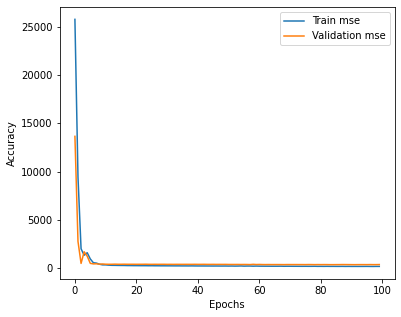

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['mse'], label='Train mse');
ax.plot(history.history['val_mse'], label='Validation mse');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
#ax = fig.add_subplot(1, 2, 2)
#ax.plot(history.history['loss'], label='train loss');
#ax.plot(history.history['val_loss'], label='evaluation loss');
#ax.legend();
#ax.set_xlabel('Epochs');
#ax.set_ylabel('Loss');

A continuación se muestra la gráfica obtenida en training, donde los puntos azules son los datos reales mientras los naranjas son los obtenidos por medio de la red.

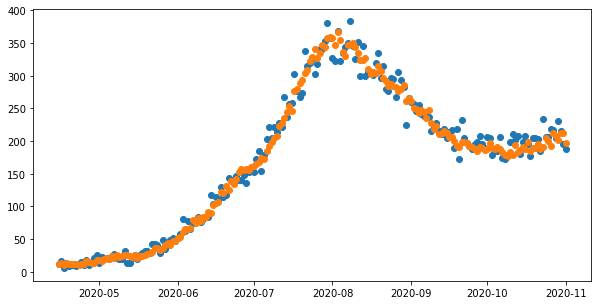

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df30a["fecha_muerte"],df30a["Y"])
y_est=model30.predict(X30_train)
plt.scatter(df30a["fecha_muerte"],y_est)

A continuación se muestra la gráfica obtenida para el test, en donde los puntos azules son los datos reales mientras los naranjas son los obtenidos por medio de la red.

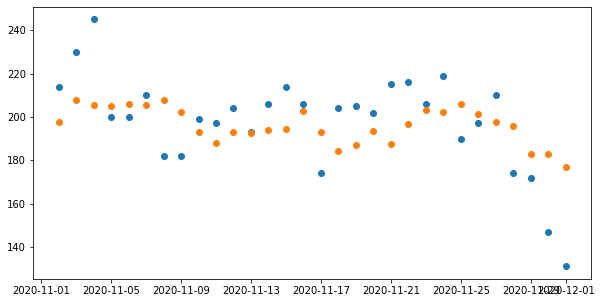

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df30b["fecha_muerte"],df30b["Y"])
y_est=model30.predict(X30_test)
plt.scatter(df30b["fecha_muerte"],y_est)

### Predicción de los siguientes 100 días
Así como se realizó anteriormente, se debe arreglar el conjunto de x del último día para generar un ciclo que vaya tanto prediciendo como creando el vector de x para la siguiente predicción.

In [ ]:
X30_pred=np.concatenate((np.array([Y30_test[len(Y30_test)-1]]), X30_test[len(X30_test)-1,0:29].T), axis=0 ).reshape((1,30))
Y30_pred=np.zeros((1,100))
for i in range(100):
  Y30_pred[0,i]=model30.predict(X30_pred)[0]
  X30_pred=np.concatenate((np.array([Y30_pred[0,i]]), X30_pred[0,0:29].T), axis=0 ).reshape((1,30))

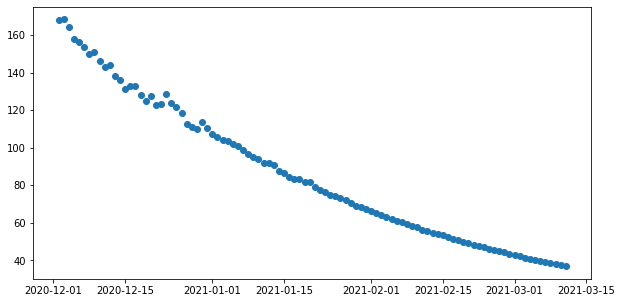

In [ ]:
import datetime
fechas_plt = pd.date_range(df30.fecha_muerte[len(df30)-1]++ datetime.timedelta(days=1), df30.fecha_muerte[len(df30)-1]+ datetime.timedelta(days=100))
plt.figure(figsize=(10,5))
plt.scatter(fechas_plt,Y30_pred)

## Conclusiones
- En ambos casos utilicé redes neuronales con pocas capas debido a la poca cantidad de datos existente, con lo cual no era buena idea aumentar la cantidad de capas por la pérdida del gradiente descendiente. Aún con esta limitación, ambas redes obtuvieron un resultado relativamente bueno; en cuanto a la cantidad de neuronas, decidí que la de 30 días tuviera más debido a que tendría más datos de entrada, es por esta razón que mejora un poco respecto a la de 7 días. Además, en cuanto a las iteraciones o epochs se evidencia que, en ambas redes, la mayor parte del aprendizaje se realiza en las primeras de estas, luego sigue aprendiendo pero de una forma poco perceptible.
- En cuanto a la predicción, en las dos redes se obtienen resultados similares debido a que las predicciones tienden a formar una tendencia decreciente muy marcada a medida que pasan los días. Esto demuestra que no es suficiente tomar únicamente los datos de días previos para la red al momento de predecir.

# **3. Solve a image classification problem with CNN's** (40 %)

As you have observed CNN architectures are the state-of-the-art to solve classification image problems. Also, in web there exist a lot of datasets to test our nets. So,

- Select one dataset with images and related with a classification problem. The dataset selected shoud be different to the other students. Please see the list [Here](https://docs.google.com/spreadsheets/d/1IkDVr9eOSispScnJrLDb3k_shdivXDzjrJ1Cr77Yjq8/edit?usp=sharing). Note that there exist other datasets forbidden. 
- Propose a CNN architecture to solve such problem
- Also implement some configuration from a pre-trained net, using transfer learning. 

- **Please dont use CIFAR,  MNIST, or any version of MNIST, such as fashion mnist**

- **REMARK CONCLUSIONS. Report all results and discuss about findings**



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">